<a href="https://colab.research.google.com/github/08vivek08/data-science/blob/main/9_Classification_Decision_Trees_drug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

<div id="about_dataset">
    <h2>About the dataset</h2>
    Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
    <br>
    <br>
    Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to.
    <br>
    <br>
    It is a sample of multiclass classifier, and you can use the training part of the dataset 
    to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.
</div>


In [2]:
!wget -O drug200.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv

--2020-12-28 09:19:55--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5827 (5.7K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.69K  --.-KB/s    in 0s      

2020-12-28 09:19:56 (574 MB/s) - ‘drug200.csv’ saved [5827/5827]



In [3]:
my_data=pd.read_csv("drug200.csv",delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
X=my_data[['Age','Sex','BP','Cholesterol','Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

As you may figure out, some features in this dataset are categorical such as **Sex** or **BP**. Unfortunately, Sklearn Decision Trees do not handle categorical variables. But still we can convert these features to numerical values. **pandas.get_dummies()**
Convert categorical variable into dummy/indicator variables.


In [5]:
from sklearn import preprocessing
le_sex=preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1]=le_sex.transform(X[:,1])

le_BP=preprocessing.LabelEncoder()
le_BP.fit(['LOW','NORMAL','HIGH'])
X[:,2]=le_BP.transform(X[:,2])

le_Chol=preprocessing.LabelEncoder()
le_Chol.fit(['NORMAL','HIGH'])
X[:,3]=le_Chol.transform(X[:,3])

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [6]:
y=my_data['Drug']
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>


Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.


In [7]:
from sklearn.model_selection import train_test_split
x_trainset,x_testset,y_trainset,y_testset=train_test_split(X,y,test_size=0.3,random_state=3)

In [8]:
print(x_trainset[0:5])
print(x_testset[0:5])
print(y_trainset[0:5])
print(y_testset[0:5])

[[26 0 0 1 19.160999999999998]
 [41 0 2 1 22.905]
 [28 0 2 0 19.675]
 [19 0 0 0 13.312999999999999]
 [50 1 2 1 15.79]]
[[73 0 2 0 19.221]
 [67 1 2 1 10.898]
 [69 0 2 0 10.065]
 [52 1 2 0 9.894]
 [28 0 2 0 12.879000000000001]]
77    drugY
73    drugY
71    drugY
78    drugA
42    drugY
Name: Drug, dtype: object
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [9]:
print(x_trainset.shape)
print(x_testset.shape)
print(y_trainset.shape)
print(y_testset.shape)

(140, 5)
(60, 5)
(140,)
(60,)


<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


In [10]:
drugTree=DecisionTreeClassifier(criterion="entropy",max_depth=4)
drugTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>


In [11]:
drugTree.fit(x_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>


In [12]:
predTree=drugTree.predict(x_testset)

In [13]:
print(predTree[0:5])
print(y_testset[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>


In [14]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTree's Accuracy: ",metrics.accuracy_score(y_testset,predTree))

DecisionTree's Accuracy:  0.9833333333333333


**Accuracy classification score** computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


<hr>

<div id="visualization">
    <h2>Visualization</h2>
    
    
Lets visualize the tree
</div>


In [15]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

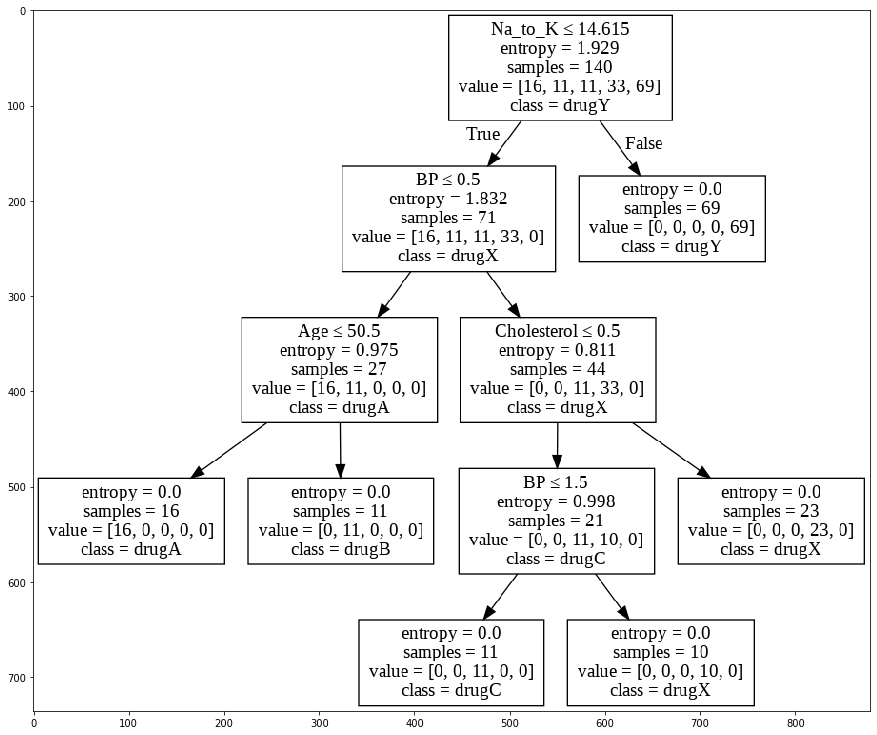

In [16]:
dot_data=StringIO()
filename="drugtree.png"
featureNames=my_data.columns[0:5]
targetNames=my_data["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames,out_file=dot_data,class_names=np.unique(y_trainset),special_characters=True,rotate=False)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img=mpimg.imread(filename)
plt.figure(figsize=(15,15))
plt.imshow(img,interpolation='nearest')